# Case Study on Banking Data Set using KNN Method

Data Set information
Source:
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014
Description:
The data is from direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be 'yes' or 'no' for subscription. 
The data set contains the bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in  [Moro et al., 2014]. You can download the data set from the following link:
https://drive.google.com/drive/u/0/folders/1lO3M2IPFvuW_h2Z_8IfNmethwPfQvVA1
Attribute Information:
Input variables:
# Bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# Attributes related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# Other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# Social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)
Output variable (desired target): 
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
Problem Statement: The data is from direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit.

In [1]:
"""
Author: Chidura Santosh
Date: 19-May-2018
Assignment: Session 26-Additional
"""

'\nAuthor: Chidura Santosh\nDate: 19-May-2018\nAssignment: Session 26-Additional\n'

# Import modules

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

# Import data

In [2]:
import pandas as pd
#read the csv file and store it in 'bank' dataframe
bank = pd.read_csv('bank-additional-full.csv', sep=';')
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# list all columns (for reference)
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
#  y (response)
# convert the response to numeric values and store as a new column
bank['outcome'] = bank.y.map({'no':0, 'yes':1})

In [5]:
bank['outcome'].head()

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64

# Comment on Features

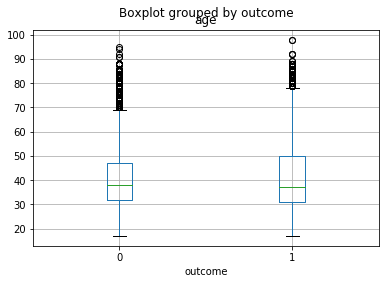

In [6]:
## 1. age
bank.boxplot(column='age', by='outcome')

In [7]:
# probably not a great feature since lot of outliers

In [8]:
## 2 .job
bank.groupby('job').outcome.mean()

job
admin.           0.129726
blue-collar      0.068943
entrepreneur     0.085165
housemaid        0.100000
management       0.112175
retired          0.252326
self-employed    0.104856
services         0.081381
student          0.314286
technician       0.108260
unemployed       0.142012
unknown          0.112121
Name: outcome, dtype: float64

In [9]:
## useful features as all values revolve around same space

In [10]:
# creating job_dummies since it is categorical (we will add it to the bank DataFrame later)
job_dummies = pd.get_dummies(bank.job, prefix='job')
job_dummies.drop(job_dummies.columns[0], axis=1, inplace=True)

In [11]:
job_dummies.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [12]:
## 3. default
bank.groupby('default').outcome.mean()

default
no         0.12879
unknown    0.05153
yes        0.00000
Name: outcome, dtype: float64

In [13]:
# looks like a useful feature

In [14]:
# check the counts of the levels in the target variable
bank.default.value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [15]:
# but only 3 persons in the dataset has a status of yes
# so, let's treat this as a 2-class feature rather than a 3-class feature

In [16]:
bank['default'] = bank.default.map({'no':0, 'unknown':1, 'yes':1})

In [17]:
# Re checking: now we have two levels in default

In [18]:
bank.groupby('default').outcome.mean()

default
0    0.128790
1    0.051512
Name: outcome, dtype: float64

In [19]:
## 4. contact
# convert the feature to numeric values

In [20]:
bank['contact'] = bank.contact.map({'cellular':0, 'telephone':1})

In [21]:
## 5. month
bank.groupby('month').outcome.mean()

month
apr    0.204787
aug    0.106021
dec    0.489011
jul    0.090466
jun    0.105115
mar    0.505495
may    0.064347
nov    0.101439
oct    0.438719
sep    0.449123
Name: outcome, dtype: float64

In [22]:
# looks like a useful feature at first glance

In [23]:
# but, it looks like their success rate is actually just correlated with number of calls
# thus, the month feature is unlikely to generalize

In [24]:
bank.groupby('month').outcome.agg(['count', 'mean']).sort_values('count')

,count,mean
month,,
dec,182,0.489011
mar,546,0.505495
sep,570,0.449123
oct,718,0.438719
apr,2632,0.204787
nov,4101,0.101439
jun,5318,0.105115
aug,6178,0.106021
jul,7174,0.090466


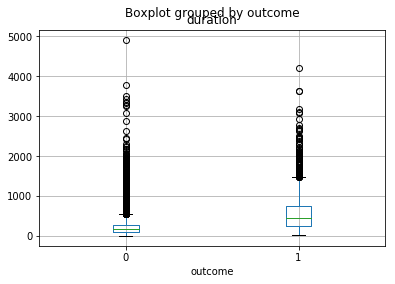

In [25]:
## 6.  duration
bank.boxplot(column='duration', by='outcome')

In [26]:
# looks like an excellent feature, but you can't know the duration of a call beforehand, thus it can't be used in your model

In [27]:
## 7.1. previous
bank.groupby('previous').outcome.mean()

previous
0    0.088322
1    0.212015
2    0.464191
3    0.592593
4    0.542857
5    0.722222
6    0.600000
7    0.000000
Name: outcome, dtype: float64

In [28]:
# looks like a useful feature

In [29]:
## 7.2.  poutcome
bank.groupby('poutcome').outcome.mean()

poutcome
failure        0.142286
nonexistent    0.088322
success        0.651129
Name: outcome, dtype: float64

In [30]:
# looks like a useful feature

In [31]:
# create poutcome_dummies
poutcome_dummies = pd.get_dummies(bank.poutcome, prefix='poutcome')
poutcome_dummies.drop(poutcome_dummies.columns[0], axis=1, inplace=True)

In [32]:
poutcome_dummies.head()

,poutcome_nonexistent,poutcome_success
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [33]:
# concatenate bank DataFrame with job_dummies and poutcome_dummies
bank = pd.concat([bank, job_dummies, poutcome_dummies], axis=1)

In [34]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_nonexistent,poutcome_success
0,56,housemaid,married,basic.4y,0,no,no,1,may,mon,...,0,0,0,0,0,0,0,0,1,0
1,57,services,married,high.school,1,no,no,1,may,mon,...,0,0,0,1,0,0,0,0,1,0
2,37,services,married,high.school,0,yes,no,1,may,mon,...,0,0,0,1,0,0,0,0,1,0
3,40,admin.,married,basic.6y,0,no,no,1,may,mon,...,0,0,0,0,0,0,0,0,1,0
4,56,services,married,high.school,0,no,yes,1,may,mon,...,0,0,0,1,0,0,0,0,1,0


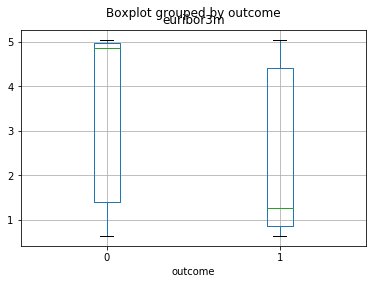

In [35]:
## 8. euribor3m
# prepare a boxplot on euribor3m by outcome, and comment on the 'euribor3m' feature
bank.boxplot(column='euribor3m', by='outcome')

In [36]:
# looks like an excellent feature

# Model building

In [37]:
## create X dataframe having 'default', 'contact', 'previous', 'euribor3m' and including 13 dummy #columns 
feature_cols = ['default', 'contact', 'previous', 'euribor3m'] + list(bank.columns[-13:])
X = bank[feature_cols]
# create y
y = bank.outcome 

In [38]:
X.head()

,default,contact,previous,euribor3m,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,poutcome_nonexistent,poutcome_success
0,0,1,0,4.857,0,0,1,0,0,0,0,0,0,0,0,1,0
1,1,1,0,4.857,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,1,0,4.857,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,1,0,4.857,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,1,0,4.857,0,0,0,0,0,0,1,0,0,0,0,1,0


In [39]:
# evaluate the model by splitting into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=12)

In [40]:
## Import the Classifier
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier

In [41]:
## Instantiate the model with 5 neighbors. 
model = KNeighborsClassifier(n_neighbors=5)

In [42]:
## Fit the model on the training data.
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [43]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)

In [44]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 1401


In [45]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Accuracy: 0.89


# How to Decide the Value of N-Neighbours

In [46]:
# Choosing a large value of K will lead to greater amount of execution time & under fitting. 
# Selecting the #small value of K will lead to over fitting. There is no guaranteed way to find the best value of K.

In [47]:
from sklearn.metrics import accuracy_score
accuracy = []
for K in range(25):
    K_value = K+1
    neigh = KNeighborsClassifier(n_neighbors = K_value)
    neigh.fit(X_train, y_train) 
    y_pred = neigh.predict(X_test)
    accuracy.append(accuracy_score(y_test,y_pred)*100)
    print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  85.773245933479 % for K-Value: 1
Accuracy is  88.50044509185078 % for K-Value: 2
Accuracy is  88.31431577243669 % for K-Value: 3
Accuracy is  88.77559278141945 % for K-Value: 4
Accuracy is  88.66229667395 % for K-Value: 5
Accuracy is  89.01837015456826 % for K-Value: 6
Accuracy is  88.60564862021526 % for K-Value: 7
Accuracy is  88.58137088290037 % for K-Value: 8
Accuracy is  88.53281540827062 % for K-Value: 9
Accuracy is  88.92125920530873 % for K-Value: 10
Accuracy is  88.81605567694425 % for K-Value: 11
Accuracy is  88.83224083515417 % for K-Value: 12
Accuracy is  88.84033341425912 % for K-Value: 13
Accuracy is  88.93744436351867 % for K-Value: 14
Accuracy is  88.92125920530873 % for K-Value: 15
Accuracy is  88.99409241725338 % for K-Value: 16
Accuracy is  88.96172210083354 % for K-Value: 17
Accuracy is  89.22068463219229 % for K-Value: 18
Accuracy is  89.17212915756252 % for K-Value: 19
Accuracy is  89.24496236950716 % for K-Value: 20
Accuracy is  89.14785142024763 % f

Text(0.5, 1.0, 'Accuracy vs # Neighbors')

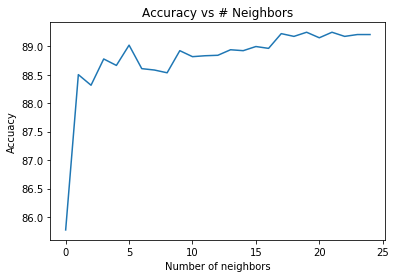

In [48]:
#Plots of Accuracy v/s Neighbours
import matplotlib.pyplot as plt
plt.plot(accuracy)
plt.ylabel("Accuacy")
plt.xlabel("Number of neighbors")
plt.title("Accuracy vs # Neighbors")